In [8]:
import pandas as pd
import numpy as np
from custom_detrending import custom_detrending, refine_detrended_flux_err, iteratively_remove_sines

import matplotlib.pyplot as plt
%matplotlib inline

from altaipony.lcio import from_path

from copy import deepcopy

from k2sc.standalone import detrend

In [193]:
EPIC = 211970427
c = 5


In [568]:
#for i in range(12,37):
I=55
flcd = from_path(f"../DetrendedLightCurves/SC_{EPIC}/{I}_{EPIC}_{c}.fits", mission="K2", mode="AltaiPony")

# flcd = custom_detrending(flcd)

plt.figure(figsize=(15,5))
plt.plot(flcd.time, flcd.detrended_flux)
#plt.plot(flc.time, flc.flux)
plt.plot(flcd.time, flcd.flux+1000, c="r");
#plt.plot(flcd.time, flcd.detrended_flux+3*flcd.detrended_flux_err, c="k");
#plt.xlim(2324.9,2325.)
#plt.ylim(23000, 27000)

FileNotFoundError: [Errno 2] No such file or directory: '../DetrendedLightCurves/SC_211970427/55_211970427_5.fits'

In [563]:
flcd.detrended_flux_err[:] = np.nanmedian(flcd.detrended_flux_err)

In [564]:
flares = flcd.find_flares().flares
flares

Found 5 candidate(s) in the (0,725) gap.


,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,total_n_valid_data_points
0,108,111,3324236.0,3324239.0,2380.983333,2380.985376,1.566075,0.190028,0.011258,725.0
1,245,252,3324374.0,3324381.0,2381.077319,2381.082087,5.119646,0.277679,0.018471,725.0
2,524,527,3324653.0,3324656.0,2381.267336,2381.269379,2.639896,0.189755,0.017434,725.0
3,568,571,3324697.0,3324700.0,2381.297303,2381.299346,1.043740,0.193397,0.006142,725.0
4,606,612,3324736.0,3324742.0,2381.323864,2381.327951,4.825789,0.260550,0.018491,725.0


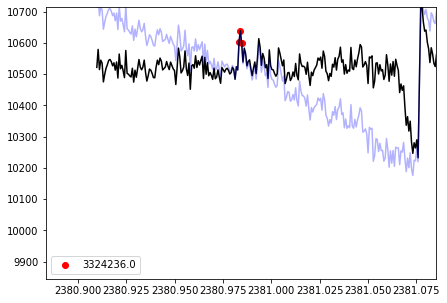

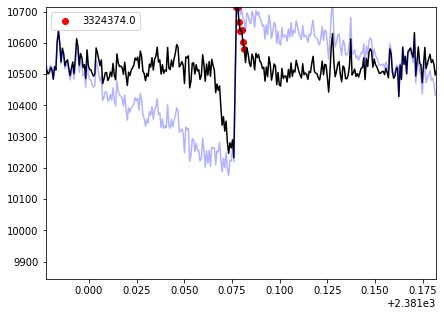

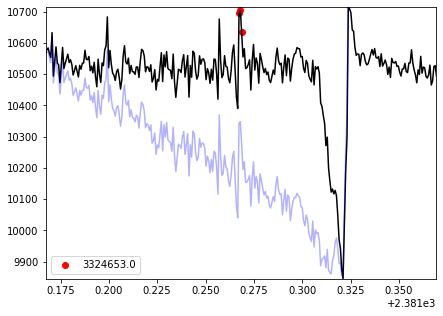

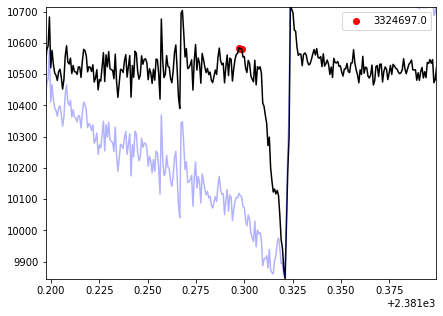

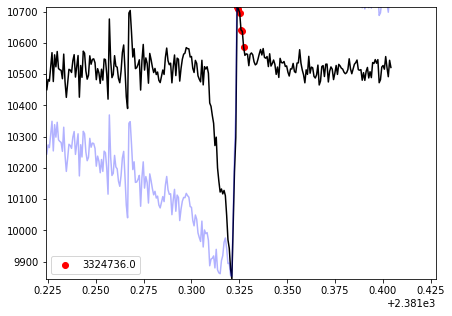

In [565]:
%matplotlib inline
for i, r in flares.iterrows():
    plt.figure(figsize=(7,5))
    plt.plot(flcd.time, flcd.detrended_flux,c="k")
    plt.plot(flcd.time, flcd.flux,c="b", alpha=.3)
    sta, sto = int(r.istart), int(r.istop)
    plt.scatter(flcd.time[sta:sto], flcd.detrended_flux[sta:sto], c="r", label=r.cstart)#, label=f"EPIC {EPIC}, C{C}")#
    plt.xlim(r.tstart-.1,r.tstop+.1)
    plt.ylim(np.nanmin(1.*flcd.detrended_flux),1.*np.nanmax(flcd.detrended_flux))
    plt.legend()

In [566]:
flares = pd.DataFrame(flares.loc[[0],:])
flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,total_n_valid_data_points
0,108,111,3324236.0,3324239.0,2380.983333,2380.985376,1.566075,0.190028,0.011258,725.0


In [567]:
with open("../k2scoc/results/tables/SC_flares.csv", "a") as f:
    flares["C"] = c
    flares["EPIC"] = EPIC
    flares["i"] = I
    flares.to_csv(f,index=False,header=False )

In [119]:
flares = flares.T
flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,total_n_valid_data_points
0,1593,1597,4.89183e+06,4.89184e+06,3448.71,3448.71,11.4278,0.438086,0.122944,2020
